In [1]:
using Percolation, PyPlot

# percolation

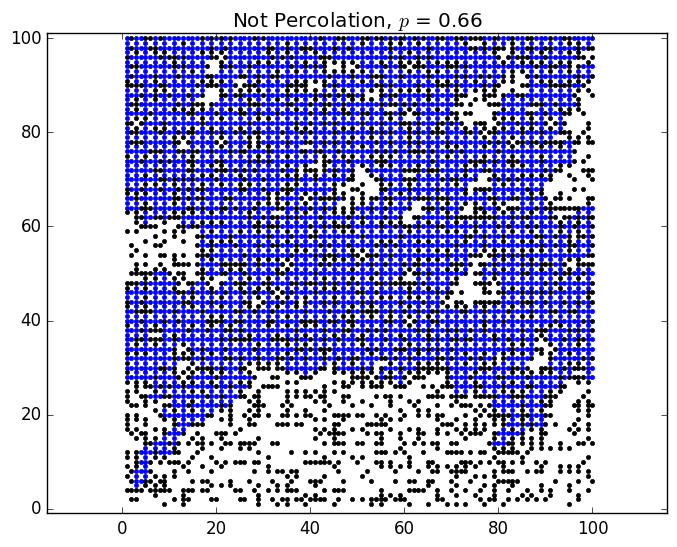

4-element Array{Int64,1}:
  -1
 101
  -1
 101

In [2]:
N = 100
p = 0.66
site = kagome(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

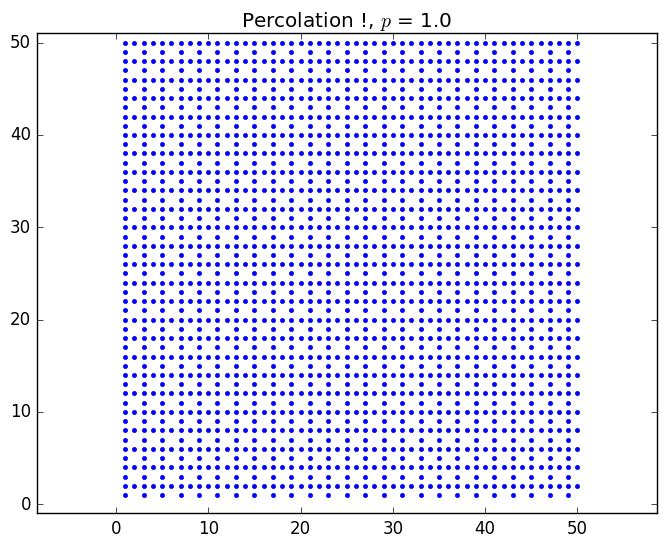

4-element Array{Int64,1}:
 -1
 51
 -1
 51

In [3]:
N = 50
p = 1.0
site = kagome(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

# cluster

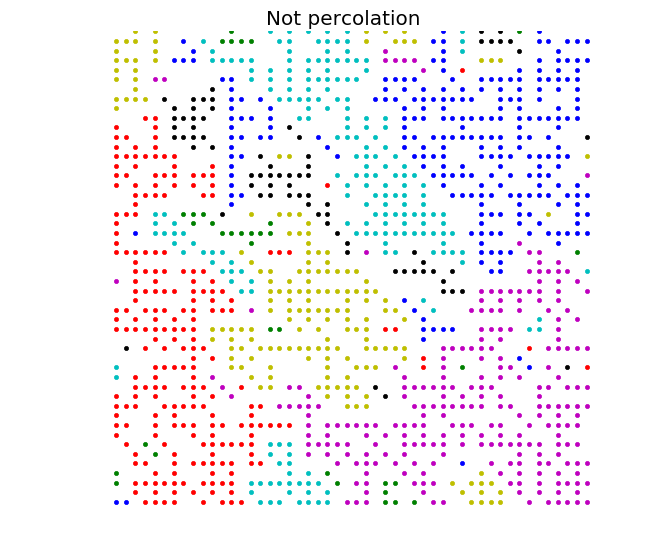

  0.002412 seconds (17.24 k allocations: 2.715 MB)


In [9]:
N = 50; p = 0.65
site = kagome(N, p)
@time cluster(site)
clusterplot(site)

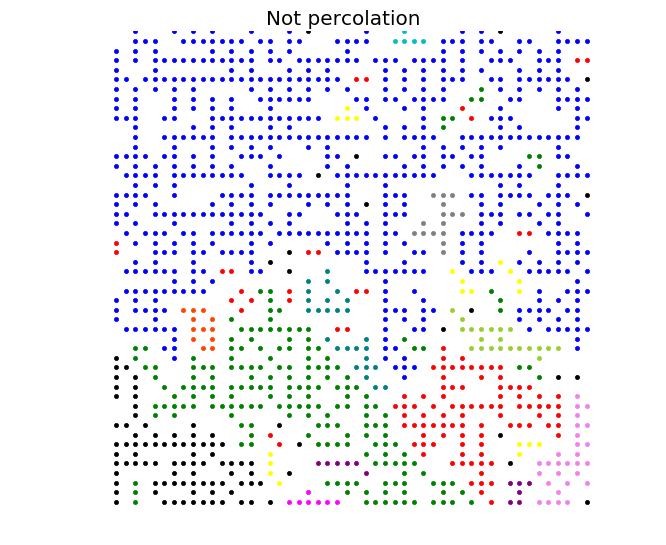

  0.004461 seconds (18.13 k allocations: 7.475 MB)


In [10]:
N = 50; p = 0.65
site = kagome(N, p)
@time cluster(site)
clusterplotsize(site)

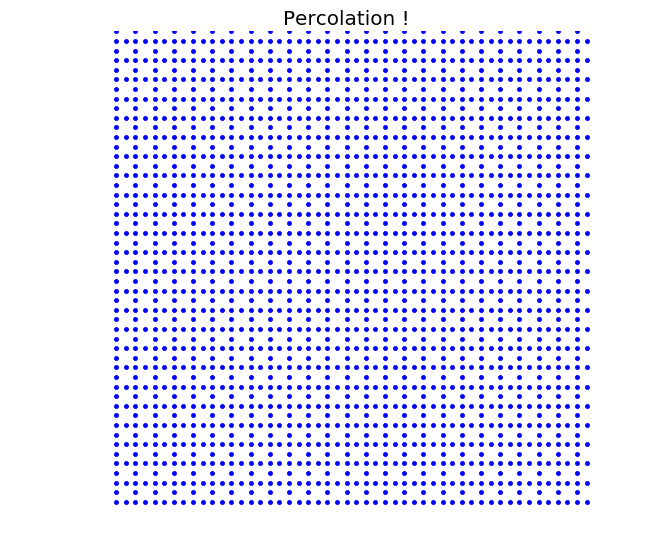

In [11]:
N = 50; p = 1.0
site = kagome(N, p)
cluster(site)
clusterplot(site)

# threshold

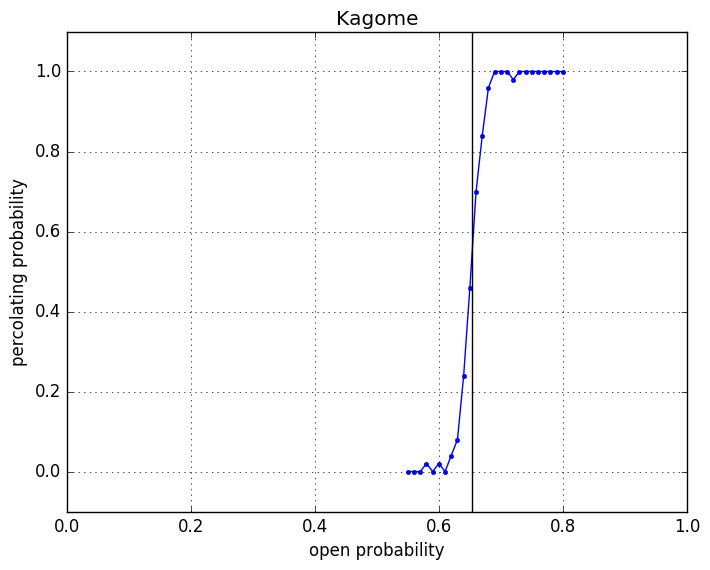

 11.558718 seconds (28.23 M allocations: 31.032 GB, 24.87% gc time)


In [6]:
plist = collect(0.55:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6527, 0.6527], [-0.5, 1.1], "k")
grid("on")
title("Kagome")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

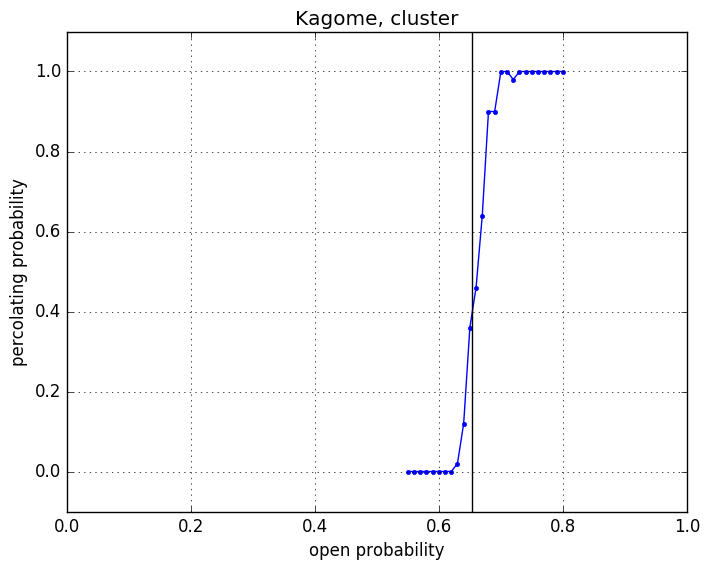

 91.820475 seconds (109.90 M allocations: 265.971 GB, 19.43% gc time)


In [7]:
# cluster
plist = collect(0.55:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        cluster(site)
        hit[i] += site.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-")
plot([0.6527, 0.6527], [-0.5, 1.1], "k")
grid("on")
title("Kagome, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);